In [ ]:
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
import os
import timeit

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, confusion_matrix)
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
def get_plot_loss_acc(model, model_name):
    fig = plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(model.history.history["loss"])
    plt.plot(model.history.history["val_loss"])
    plt.title(f"{model_name} \n\n model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="upper right")

    plt.subplot(2, 1, 2)
    plt.plot(model.history.history["accuracy"])
    plt.plot(model.history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="lower right")

    plt.tight_layout()


def compute_confusion_matrix(
    ytrue, ypred, class_names, model_name
):
    cm = confusion_matrix(
        y_true=ytrue.labels,
        y_pred=np.argmax(ypred, axis=1),
    )

    cmn = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.subplots(figsize=(6, 5))
    sns.heatmap(
        cmn,
        annot=True,
        fmt=".2f",
        cmap="Purples",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show(block=False)


def get_evaluate(data, name, model):
    score_model = model.evaluate(data, verbose=1)
    print(f"{name} loss: {score_model[0]:.2f}")
    print(f"{name} accuracy: {score_model[1]:.2f}")


def get_predict(data, model):
    predict_model = model.predict(data)
    return predict_model


def get_metrics(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"Accuracy Score - {model_name}: {acc:.2f}")
    print(f"Balanced Accuracy Score - {model_name}: {bal_acc:.2f}")
    print("\n")

    print(classification_report(y_test, y_pred))

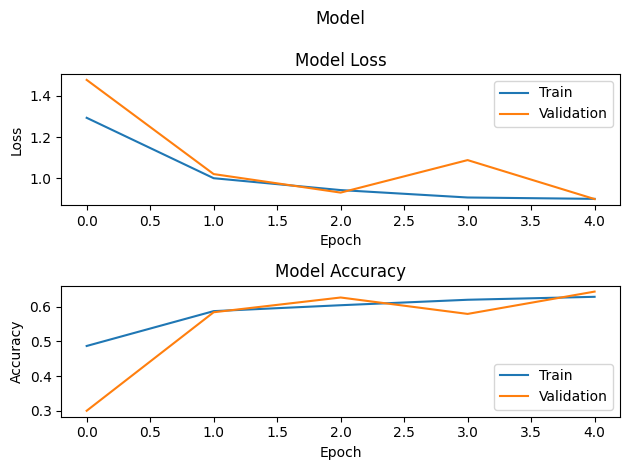

In [ ]:
def get_plot_loss_acc(model_history, model_name):
    fig = plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(model_history["loss"])
    plt.plot(model_history["val_loss"])
    plt.title(f"{model_name}\n\nModel Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="upper right")

    plt.subplot(2, 1, 2)
    plt.plot(model_history["accuracy"])
    plt.plot(model_history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="lower right")

    plt.tight_layout()


    # Assuming model_history is a dictionary containing loss and accuracy values
model_history = {
    "loss": [1.2939, 1.0014, 0.9439, 0.9080, 0.9014],
    "accuracy": [0.4865, 0.5867, 0.6037, 0.6194, 0.6279],
    "val_loss": [1.4775, 1.0214, 0.9317, 1.0891, 0.9004],
    "val_accuracy": [0.3002, 0.5835, 0.6259, 0.5787, 0.6429]
}

get_plot_loss_acc(model_history, "Model")



In [ ]:
model_name = "MobileNet"
class_names = ['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']

target_size = (224, 224)
epochs = 100
batch_size = 32
img_shape = (224, 224, 3)

# # Save model
# save_model_ft = os.path.join('models', f'model_{model_name}_ft.hdf5')

In [ ]:
train_path = '/content/drive/MyDrive/Lab/train'
test_path = '/content/drive/MyDrive/Lab/test'
val_path = '/content/drive/MyDrive/Lab/val'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(224, 224),
      color_mode='rgb',
      class_mode='categorical',
      batch_size=32
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(224, 224),
      color_mode='rgb',
      shuffle=True,
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem
      class_mode='categorical',
      batch_size=32
      )
valid = test_data_gen.flow_from_directory(
      val_path,
      target_size=(224, 224),
      color_mode='rgb',
      class_mode='categorical',
      batch_size= 32
       )

Found 5778 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.
Found 826 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [ ]:
# classes = np.unique(y_train)

# Callbacks
early = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0.01, patience=8,
            restore_best_weights=True
        )
plateau = tf.keras.callbacks.ReduceLROnPlateau(
                monitor='loss', factor=0.1, min_delta=0.01,
                min_lr=1e-10, patience=4, mode='auto'
            )

In [ ]:
model = tf.keras.applications.MobileNet(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet",
)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in model.layers:
    layer.trainable = True

model_ft = tf.keras.models.Sequential(
    [
        model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation="softmax"),
    ]
)

model_ft.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 5)                 5125      
                                                                 
Total params: 3233989 (12.34 MB)
Trainable params: 3212101 (12.25 MB)
Non-trainable params: 21888 (85.50 KB)
_________________________________________________________________


In [ ]:
model_ft.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

start_ft = timeit.default_timer()

history = model_ft.fit(
    train,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early, plateau],
    validation_data=valid,
    # class_weight=train_class_weights,
    verbose=1,
)

stop_ft = timeit.default_timer()

Epoch 1/100
181/181 [==============================] - 1475s 8s/step - loss: 1.2499 - accuracy: 0.5016 - val_loss: 2.5789 - val_accuracy: 0.4709 - lr: 0.0010
Epoch 2/100
181/181 [==============================] - 98s 540ms/step - loss: 0.9572 - accuracy: 0.5995 - val_loss: 1.2204 - val_accuracy: 0.5920 - lr: 0.0010
Epoch 3/100
181/181 [==============================] - 97s 535ms/step - loss: 0.8744 - accuracy: 0.6352 - val_loss: 0.8884 - val_accuracy: 0.6356 - lr: 0.0010
Epoch 4/100
181/181 [==============================] - 97s 535ms/step - loss: 0.8429 - accuracy: 0.6390 - val_loss: 0.9872 - val_accuracy: 0.6174 - lr: 0.0010
Epoch 5/100
181/181 [==============================] - 98s 540ms/step - loss: 0.7947 - accuracy: 0.6630 - val_loss: 0.8815 - val_accuracy: 0.6489 - lr: 0.0010
Epoch 6/100
181/181 [==============================] - 95s 524ms/step - loss: 0.7833 - accuracy: 0.6701 - val_loss: 0.8823 - val_accuracy: 0.6489 - lr: 0.0010
Epoch 7/100
181/181 [==========================

In [ ]:
execution_time_ft = (stop_ft - start_ft) / 60
print(
    f"Model {model_name} fine tuning executed in {execution_time_ft:.2f} minutes"
)

Model MobileNet fine tuning executed in 56.75 minutes


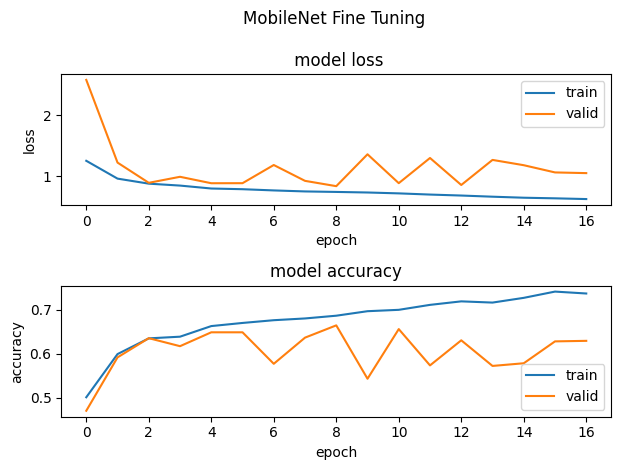

In [ ]:
get_plot_loss_acc(model_ft, f"{model_name} Fine Tuning")

In [ ]:
# Evaluate Model
loss, accuracy = model_ft.evaluate(test, steps=test.samples // batch_size)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

51/51 [==============================] - 343s 7s/step - loss: 0.7626 - accuracy: 0.6893
Test Loss: 0.7626110911369324, Test Accuracy: 0.689338207244873


52/52 [==============================] - 10s 188ms/step


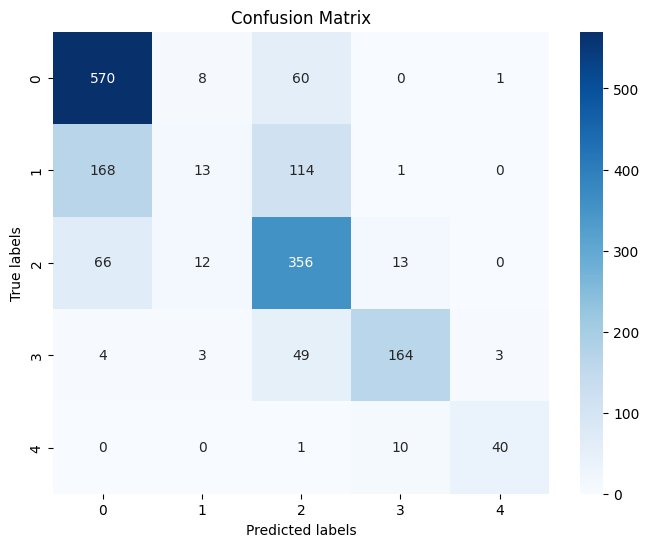

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       639
           1       0.36      0.04      0.08       296
           2       0.61      0.80      0.69       447
           3       0.87      0.74      0.80       223
           4       0.91      0.78      0.84        51

    accuracy                           0.69      1656
   macro avg       0.69      0.65      0.64      1656
weighted avg       0.65      0.69      0.64      1656



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
y_true = []
for i in range(len(test)):
    y_true.extend(np.array(test[i][1]))

y_true = np.argmax(y_true, axis=-1)

# Get predicted labels
y_pred = model_ft.predict(test)
y_pred = np.argmax(y_pred, axis=-1)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
# True labels
true_labels = test.classes

In [ ]:
NUM_CLASSES = 5

In [ ]:
# AU-ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(true_labels == i, ensemble_predictions[:, :, i].mean(axis=0))
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

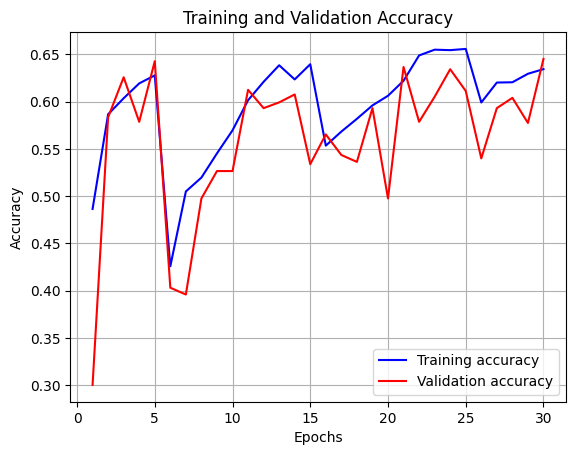

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values from the training logs
train_accuracy = [0.4865, 0.5867, 0.6037, 0.6194, 0.6279,
                  0.4258, 0.5050, 0.5197, 0.5453, 0.5697,
                  0.6016, 0.6211, 0.6386, 0.6236, 0.6397,
                  0.5535, 0.5684, 0.5819, 0.5961, 0.6063,
                  0.6222, 0.6490, 0.6551, 0.6546, 0.6559,
                  0.5992, 0.6203, 0.6206, 0.6296, 0.6345]

val_accuracy = [0.3002, 0.5835, 0.6259, 0.5787, 0.6429,
                0.4031, 0.3959, 0.4976, 0.5266, 0.5266,
                0.6126, 0.5932, 0.5993, 0.6077, 0.5339,
                0.5654, 0.5436, 0.5363, 0.5932, 0.4976,
                0.6368, 0.5787, 0.6053, 0.6344, 0.6114,
                0.5400, 0.5932, 0.6041, 0.5775, 0.6453]

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


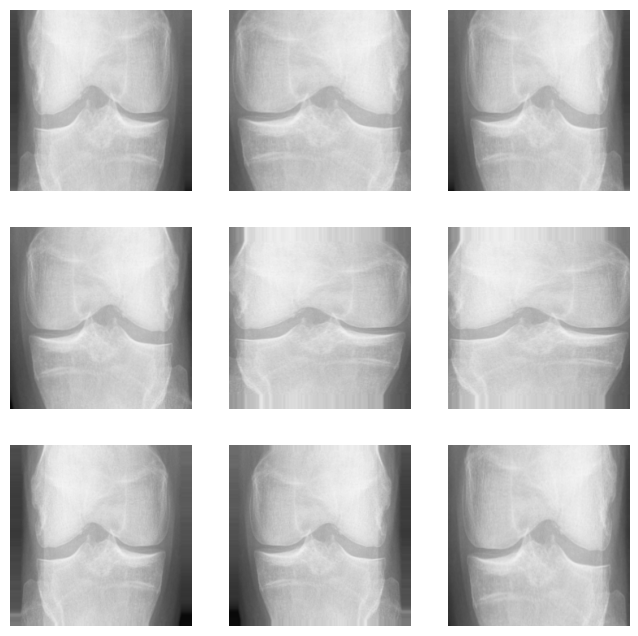

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Path to the image
img_path = '/content/drive/MyDrive/Lab/train/0/9001897L.png'

# Load the image
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Apply augmentation using the ImageDataGenerator
augmented_img = image_gen.flow(img_array)

# Visualize the augmented image
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    batch = augmented_img.next()
    image_plot = batch[0].astype('uint8')
    plt.imshow(image_plot)
    plt.axis('off')
plt.show()
